In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #seaborn
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Loading the data and checking the data

In [ ]:
iris = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

In [ ]:
iris.head()

In [ ]:
iris.info()

#### There are no null values in the dataset

In [ ]:
iris['species'].value_counts()

#### There are three classes each having 50 rows. The dataset is well balanced

In [ ]:
iris.describe()

# Univariate Analysis on data

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

# Distribution plots

Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points
lie within that group. (histogram)
* Probability Density Function (PDF) is the probability that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group.

Univariate analysis here i’am using pdf,cdf graph and box-plot and violin plot.

In [ ]:
sns.FacetGrid(iris,hue='species',size=7).map(sns.distplot,'sepal_length').add_legend()

Sepal length histograms overlap each other Not a good feature to consider

In [ ]:
sns.FacetGrid(iris,hue='species',height=7).map(sns.distplot,'sepal_width').add_legend()

This is also not the good one as many overlappings are there

In [ ]:
sns.FacetGrid(iris,hue='species',size=7).map(sns.distplot,'petal_length').add_legend()

This is much better than previous two plots. Here you can say the setosa flowers are well seperated from versicolor and virginica. Eventhough versicolor and virginica intersects, better value than previous one

In [ ]:
sns.FacetGrid(iris,hue='species',size=7).map(sns.distplot,'petal_width').add_legend()

### Observations:
* by using petal length we can separate iris-setosa
* by using sepal length,sepal width we can’t do anything because it’s all messed up and we can’t separate the flowers
* in petal width iris setosa is not distributed properly
* so we are using the petal length as feature to separate at least the iris setosa.

So plot the graph by finding the pdf and cdf .
Here for each feature there will be seperate pdf and cdf.

To choose between the petal_length and petal_width, we do CDF

In [ ]:
count,bin_edges = np.histogram(iris[iris['species']=='Iris-versicolor']['petal_length'])
plt.plot(bin_edges[1:],count/(sum(count)))
plt.plot(bin_edges[1:],np.cumsum(count/(sum(count))))

count,bin_edges = np.histogram(iris[iris['species']=='Iris-virginica']['petal_length'])
plt.plot(bin_edges[1:],count/(sum(count)))
plt.plot(bin_edges[1:],np.cumsum(count/(sum(count))))
plt.grid()

If we take petal_length as a single variable used for classification, there we can set a threshold at 5 to classify versicolor and virginica

In [ ]:
count,bin_edges = np.histogram(iris[iris['species']=='Iris-versicolor']['petal_width'])
plt.plot(bin_edges[1:],count/(sum(count)))
plt.plot(bin_edges[1:],np.cumsum(count/(sum(count))))

count,bin_edges = np.histogram(iris[iris['species']=='Iris-virginica']['petal_width'])
plt.plot(bin_edges[1:],count/(sum(count)))
plt.plot(bin_edges[1:],np.cumsum(count/(sum(count))))
plt.grid()

Compared to petal_length, petal_width gives more number of errors. So, we keep petal_length as classifying feature and create if else model.

setting threshold as 5.1 (refer petal_length cdf)

if pl>0 and pl<=2:
    setosa
else if pl>3 and pl<=5.2:
    versicolor
else if pl>3 and pl>5.2:
    virginica
    
    
This gives minimum number of errors as it is compared with the petal_width

# What is Mean,Median and Standard Deviation

In [ ]:
iris_setosa = iris.loc[iris['species']=='Iris-setosa']

In [ ]:
print(np.mean(iris_setosa['petal_length']))

The above mean is normaly calculated with the data. Let us see what will happen to the mean if we enter some wrong innformation

In [ ]:
print(np.mean(np.append(iris_setosa['petal_length'],50)))

Here what we are doing is we appending the value 50 to the values of petal length. So the mean value is drastically changing from 1.4 to 2.4

In [ ]:
print(np.std(iris_setosa['petal_length']))

Standard deviation is basically the spread of the data from the mean. since the std value is 0.17 here, the first spread of data points from mean-0.17 to mean+0.17

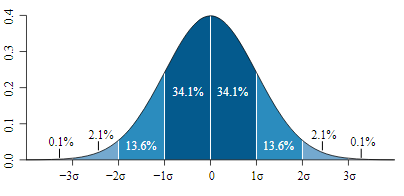

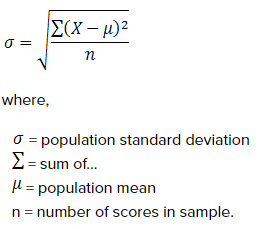

In [ ]:
print(np.median(iris_setosa['petal_length']))

In [ ]:
print(np.median(np.append(iris_setosa['petal_length'],50)))

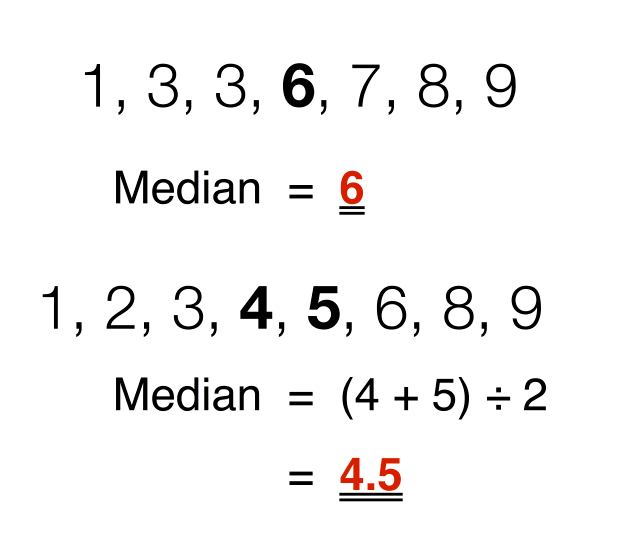

So you can see even with the outliers, median value hasn't changed at all. It still remains the same. Impact of outliers on median is only when outliers values are more than the original values. That is greater than 50%

# Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

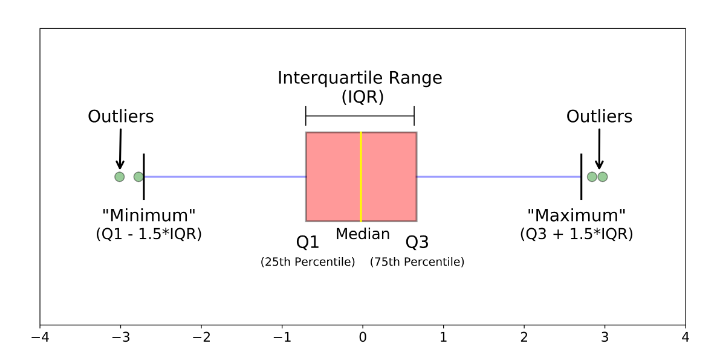

In [ ]:
sns.boxplot(x='species',y='sepal_length',data=iris)

In [ ]:
sns.boxplot(x='species',y='sepal_width',data=iris)

In [ ]:
sns.boxplot(x='species',y='petal_length',data=iris)

In [ ]:
sns.boxplot(x='species',y='petal_width',data=iris)

# Violin Plots

Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.
The density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.
Violin Plots hold more information than the box plots, they are less popular. Because of their unpopularity, their meaning can be harder to grasp for many readers not familiar with the violin plot representation.
Now let’s plot violin plot for our iris data set.

In [ ]:
sns.violinplot(x='species',y='petal_length',size=7,data=iris)

# Bivariate analysis

**Scatter plot**

* A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis
* we can plot the scatter plot between any two features.

i’am taking an example of petal length and petal width.

In [ ]:
sns.lmplot('petal_length','petal_width',hue='species',data=iris,fit_reg=False)

## Pair plots

Pair Plots are a really simple (one-line-of-code simple!) way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data.
pair plot gives scatter plot of different features.

In [ ]:
sns.pairplot(iris,hue='species')

* from the graph we can see the scatter plot between the any two features and the distributions.
* from the distributions above peatl length is separating the iris setosa from remaining .
* from plot between petal length and petal width we can separate the flowers easily

**Example:(assumed observations from graph)**

if 0≤petal_length≤2 and 0≤petal_width≤0.7, then setosa

if 2≤petal_lenght≤5.2 and 1≤petal_length≤1.7, then versicolor

else virginica